In [384]:
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Definindo a função valor

In [385]:
acoes = {
  0: "Tomar insulina",
  1: "Comer",
  2: "Fazer exercício"
}

n_acoes = len(acoes)

estados = {
  0: "Glicose baixa",
  1: "Glicose média",
  2: "Glicose alta"
}

n_estados = len(estados)

### 2. Modelando o ambiente

In [386]:
class Diabetes:
  def __init__(self):
    self.state = random.randint(0,2)
  
  def reset(self):
    self.state = random.randint(0,2)
    return self.state
  
  def step(self, action):
    # Tomar insulina
    if action == 0:
      if self.state == 2:
        next_state = 1
      else:
        next_state = 0

    # Comer
    elif action == 1:
      if self.state == 0:
        next_state = 1
      else:
        next_state = 2

    # Fazer exercício
    elif action == 2:
      if self.state == 2:
        next_state = 1
      else:
        next_state = 0

    # Recompensa 
    if self.state == 1:
      reward = 20
    else: 
      reward = -5

    self.state = next_state
    return next_state, reward

### 3. Treinamento usando Q-Learning

In [387]:
env = Diabetes()
def q_learning(alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99):
	# Criando a Q-table
	q_table = np.zeros((n_estados,n_acoes))

	episodes = 2000
	recompensas = []
	for episode in range(episodes):
		state = env.reset()
		total_recompensa = 0
  
		for step in range(100):
			# escolher ação
			if random.uniform(0, 1) < epsilon:
				action = random.randint(0,2) 
			else:
				action = np.argmax(q_table[state])

			# realizar ação
			next_state, recompensa = env.step(action)
			
			# atualizar a Q-table
			td_target = recompensa + gamma * q_table[next_state, np.argmax(q_table[next_state])]
			td_error = td_target - q_table[state, action]
			q_table[state, action] += alpha * td_error
			
			# calcular recompensa acumulada
			state = next_state
			total_recompensa += recompensa

		if (episode + 1) % 100 == 0:
				print(f"Episódio {episode + 1}/{episodes} - Recompensa Total: {total_recompensa} - Epsilon: {epsilon:.3f}")

		recompensas.append(total_recompensa)
		epsilon = max(0.01, epsilon * epsilon_decay)

	return q_table, recompensas

q_table, recompensas = q_learning()

Episódio 100/2000 - Recompensa Total: 600 - Epsilon: 0.370
Episódio 200/2000 - Recompensa Total: 725 - Epsilon: 0.135
Episódio 300/2000 - Recompensa Total: 725 - Epsilon: 0.050
Episódio 400/2000 - Recompensa Total: 725 - Epsilon: 0.018
Episódio 500/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 600/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 700/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 800/2000 - Recompensa Total: 725 - Epsilon: 0.010
Episódio 900/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1000/2000 - Recompensa Total: 725 - Epsilon: 0.010
Episódio 1100/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1200/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1300/2000 - Recompensa Total: 725 - Epsilon: 0.010
Episódio 1400/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1500/2000 - Recompensa Total: 725 - Epsilon: 0.010
Episódio 1600/2000 - Recompensa Total: 750 - Epsilon: 0.010
Episódio 1700/2000 - Recompensa Total: 750 - Epsi

### 5. Plotar os resultados

Q-table:
[[731.28140704 743.71859296 731.28140704]
 [756.28140704 756.28140704 756.28140704]
 [737.1000422  726.57815013 743.71859296]]


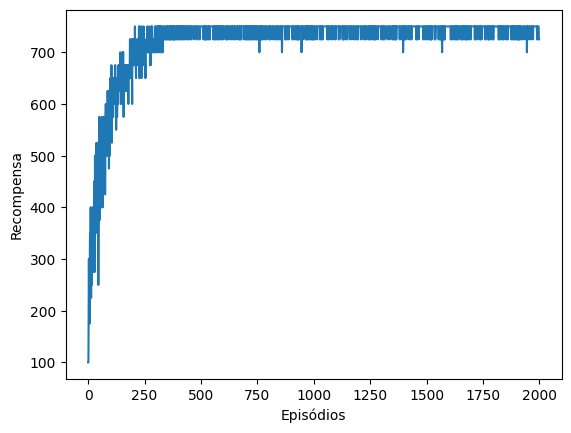

In [388]:
print("Q-table:")
print(q_table)

plt.plot(recompensas)
plt.xlabel('Episódios')
plt.ylabel('Recompensa')
plt.show()